In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)

In [3]:
survey_data = pd.read_csv('C:/python/data/survey_results_public.csv',index_col = 'ResponseId')
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [4]:
survey_data_sche = pd.read_csv('C:/python/data/survey_results_schema.csv',index_col ='qname')['question']
survey_data_sche

qname
S0                      <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                                Browser Meta Info
S1                      <span style="font-size:22px; font-family: aria...
MainBranch              Which of the following options best describes ...
Employment              Which of the following best describes your cur...
RemoteWork              Which best describes your current work situation?
CodingActivities        Which of the following best describes the code...
S2                      <span style="font-size:22px; font-family: aria...
EdLevel                 Which of the following best describes the high...
LearnCode               How did you learn to code? Select all that apply.
LearnCodeOnline         What online resources do you use to learn to c...
LearnCodeCoursesCert    What online courses or certifications do you u...
YearsCode               Including any education, how many years have y...
YearsCodePro            NOT incl

In [5]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [6]:
survey_df = survey_data[selected_columns].copy()
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [7]:
def count_nan(Series):
    
    return np.sum(Series.isnull())

In [8]:
#Series.replace(변경 전의 값, 변경 후의 값, inplace=True)
survey_df['YearsCode'].replace('Less than 1 year',0,inplace=True)
survey_df['YearsCode'].replace('More than 50 years',51,inplace=True)
survey_df['YearsCode'] = survey_df['YearsCode'].astype('float')
print(survey_df['YearsCode'].dtypes)
survey_df['YearsCode'].unique()

float64


array([nan, 14., 20.,  8., 15.,  3.,  1.,  6., 37.,  5., 12., 22., 11.,
        4.,  7., 13., 36.,  2., 25., 10., 40., 16., 27., 24., 19.,  9.,
       17., 18., 26., 51., 29., 30., 32.,  0., 48., 45., 38., 39., 28.,
       23., 43., 21., 41., 35., 50., 33., 31., 34., 46., 44., 42., 47.,
       49.])

In [9]:
survey_df['YearsCodePro'].replace('Less than 1 year',0,inplace=True)
survey_df['YearsCodePro'].replace('More than 50 years',51,inplace=True)
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].astype('float')
print(survey_df['YearsCodePro'].dtypes)
survey_df['YearsCodePro'].unique()

float64


array([nan,  5., 17.,  3.,  6., 30.,  2., 10., 15.,  4., 22., 20., 40.,
        9., 14., 21.,  7., 18., 25.,  8., 12., 45.,  1., 19., 28., 24.,
       11., 23.,  0., 32., 27., 16., 44., 26., 37., 46., 13., 31., 39.,
       34., 38., 35., 29., 42., 36., 33., 43., 41., 48., 50., 51., 47.,
       49.])

In [10]:
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size']=14
mpl.rcParams['figure.figsize']=(9,5)
mpl.rcParams['figure.facecolor']='#00000000' #배경색=흰 색
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

Black And White Picture
Noto Serif Ahom


In [11]:
mpl.rcParams['font.family']='Black And white Picture'
print(mpl.rcParams['font.family'])
mpl.rcParams['axes.unicode_minus']=False

['Black And white Picture']


In [12]:
emp = survey_df.Employment.value_counts(True)*100
emp.head(15)

Employed, full-time                                                         59.911587
Student, full-time                                                           9.421412
Independent contractor, freelancer, or self-employed                         6.941946
Employed, full-time;Independent contractor, freelancer, or self-employed     4.861314
Not employed, but looking for work                                           2.553375
Student, full-time;Employed, part-time                                       1.628805
Employed, part-time                                                          1.578602
Student, part-time                                                           1.457279
Employed, full-time;Student, full-time                                       1.355478
Employed, full-time;Student, part-time                                       1.319221
Student, full-time;Not employed, but looking for work                        1.016609
Student, part-time;Employed, part-time                

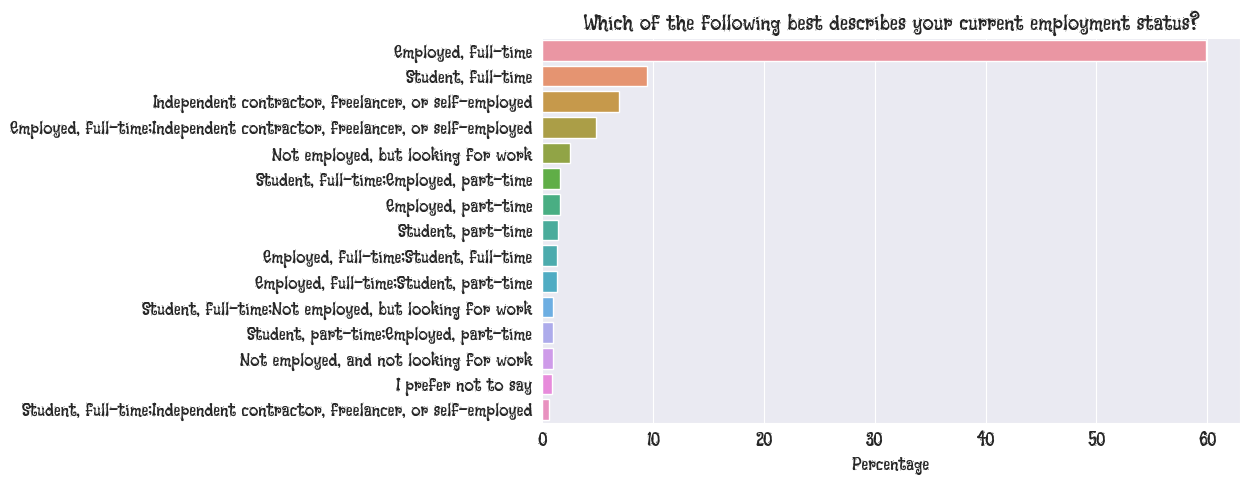

In [13]:
plt.title(survey_data_sche['Employment'])
sns.barplot(x=emp.head(15), y=emp.head(15).index) #countplot은 data=dataframe 넣고, x나 y에는 columns명 입력!
plt.xlabel('Percentage')
plt.show()

In [14]:
# matplotlib에서 적용할 수 있는 style 목록 조회
print(plt.style.available)
# style의 적용
plt.style.use('Solarize_Light2')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [15]:
survey_df.DevType = survey_df.DevType.dropna()

In [16]:
survey_df.DevType.unique()

array([nan,
       'Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
       'Developer, full-stack', ...,
       'Data scientist or machine learning specialist;Developer, front-end;Developer, full-stack;Developer, back-end;Developer, QA or test;Developer, mobile;Database administrator;Cloud infrastructure engineer;Data or business analyst;Designer;Blockchain',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, mobile;Educator;Developer, embedded applications or devices',
       'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test;Student;Developer, mobile;Academic researcher;DevOps specialist;Developer, embedded applications or devices;Developer, game or graphics;Cloud infrastructure engineer;Data or business analyst;Designer;Scie

In [17]:
for items in survey_df.DevType.value_counts().items():
    print(items[0])

Developer, full-stack
Developer, back-end
Developer, front-end
Developer, front-end;Developer, full-stack;Developer, back-end
Developer, full-stack;Developer, back-end
Developer, mobile
Other (please specify):
Student
Developer, front-end;Developer, full-stack
Developer, desktop or enterprise applications
Developer, back-end;Developer, desktop or enterprise applications
Developer, embedded applications or devices
Engineering manager
Data scientist or machine learning specialist
Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications
Developer, full-stack;Student
Developer, full-stack;Developer, desktop or enterprise applications
Developer, full-stack;Developer, mobile
Developer, back-end;Cloud infrastructure engineer
Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications
Developer, front-end;Developer, mobile
Engineer, data
Developer, front-end;Developer, full-stack;Developer, back-end;Developer, mobi

In [18]:
columns = []
for items in survey_df.DevType.value_counts().items():
    #print(items[0].split(';'))
    for i in (items[0].split(';')):
        columns.append(i)
    #print(items[0].split(';')[0])
    #columns.append(items[0].split(';')[0])
columns = set(columns)
list(columns)

['Student',
 'System administrator',
 'Engineer, data',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, full-stack',
 'Developer, embedded applications or devices',
 'Designer',
 'Security professional',
 'Other (please specify):',
 'DevOps specialist',
 'Educator',
 'Developer, desktop or enterprise applications',
 'Cloud infrastructure engineer',
 'Academic researcher',
 'Marketing or sales professional',
 'Scientist',
 'Data or business analyst',
 'Developer, QA or test',
 'Database administrator',
 'Developer, mobile',
 'Engineer, site reliability',
 'Blockchain',
 'Product manager',
 'Developer, front-end',
 'Data scientist or machine learning specialist',
 'Developer, game or graphics',
 'Developer, back-end',
 'Project manager',
 'Engineering manager']

In [19]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [20]:
keys = list(columns)
data ={}
data = dict.fromkeys(keys, survey_df.DevType)
data

{'Student': ResponseId
 1                                                      NaN
 2                                                      NaN
 3        Data scientist or machine learning specialist;...
 4                                    Developer, full-stack
 5        Developer, front-end;Developer, full-stack;Dev...
                                ...                        
 73264                                  Developer, back-end
 73265        Data scientist or machine learning specialist
 73266    Developer, full-stack;Developer, desktop or en...
 73267    Developer, front-end;Developer, desktop or ent...
 73268    Developer, front-end;Engineer, data;Engineer, ...
 Name: DevType, Length: 73268, dtype: object,
 'System administrator': ResponseId
 1                                                      NaN
 2                                                      NaN
 3        Data scientist or machine learning specialist;...
 4                                    Developer, full-s

In [21]:
dev_type_df = pd.DataFrame(data=data, index=survey_df.DevType.index, columns=list(columns))
dev_type_df

Student  \
ResponseId                                                      
1                                                         NaN   
2                                                         NaN   
3           Data scientist or machine learning specialist;...   
4                                       Developer, full-stack   
5           Developer, front-end;Developer, full-stack;Dev...   
...                                                       ...   
73264                                     Developer, back-end   
73265           Data scientist or machine learning specialist   
73266       Developer, full-stack;Developer, desktop or en...   
73267       Developer, front-end;Developer, desktop or ent...   
73268       Developer, front-end;Engineer, data;Engineer, ...   

                                         System administrator  \
ResponseId                                                      
1                                                         NaN   
2                                                         NaN   
3           Data scientist or machine learning specialist;...   
4                                       Developer, full-stack   
5           Developer, front-end;Developer, full-stack;Dev...   
...                                                       ...   
73264                                     Developer, back-end   
73265           Data scientist or machine learning specialist   
73266       Developer, full-stack;Developer, desktop or en...   
73267       Developer, front-end;Developer, desktop or ent...   
73268       Developer, front-end;Engineer, data;Engineer, ...   

                                               Engineer, data  \
ResponseId                                                      
1                                                         NaN   
2                                                         NaN   
3           Data scientist or machine learning specialist;...   
4                                       Developer, full-stack   
5           Developer, front-end;Developer, full-stack;Dev...   
...                                                       ...   
73264                                     Developer, back-end   
73265           Data scientist or machine learning specialist   
73266       Developer, full-stack;Developer, desktop or en...   
73267       Developer, front-end;Developer, desktop or ent...   
73268       Developer, front-end;Engineer, data;Engineer, ...   

                         Senior Executive (C-Suite, VP, etc.)  \
ResponseId                                                      
1                                                         NaN   
2                                                         NaN   
3           Data scientist or machine learning specialist;...   
4                                       Developer, full-stack   
5           Developer, front-end;Developer, full-stack;Dev...   
...                                                       ...   
73264                                     Developer, back-end   
73265           Data scientist or machine learning specialist   
73266       Developer, full-stack;Developer, desktop or en...   
73267       Developer, front-end;Developer, desktop or ent...   
73268       Developer, front-end;Engineer, data;Engineer, ...   

                                        Developer, full-stack  \
ResponseId                                                      
1                                                         NaN   
2                                                         NaN   
3           Data scientist or machine learning specialist;...   
4                                       Developer, full-stack   
5           Developer, front-end;Developer, full-stack;Dev...   
...                                                       ...   
73264                                     Developer, back-end   
73265           Data scientist or machine learning specialist   
73266       Develope

In [22]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]

In [23]:
def split_multicolumn2(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True #a.strip() 양 끝 공백 제거, .at[idx,columns]=loc와 비슷
        else :
            pass
    return df
split_multicolumn2(survey_df['DevType']).sum()

Data scientist or machine learning specialist     3424
Developer, full-stack                            28701
Developer, front-end                             15915
Developer, back-end                              26595
Developer, desktop or enterprise applications     9546
Engineering manager                               3574
Engineer, data                                    3600
Student                                           5595
Other (please specify):                           2618
Engineer, site reliability                        1947
Developer, mobile                                 7634
Marketing or sales professional                    518
Developer, embedded applications or devices       3923
DevOps specialist                                 6170
Designer                                          3764
Database administrator                            4934
System administrator                              4908
Developer, QA or test                             3096
Product ma

In [24]:
result = split_multicolumn(survey_df.DevType).sum() # 컬럼별 집계
result.sort_values(ascending=False)

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

In [25]:
sum(result.values)

164790

In [26]:
devtype_percentage = (result/sum(result.values)*100).sort_values(ascending=False)
devtype_percentage

Developer, full-stack                            17.416712
Developer, back-end                              16.138722
Developer, front-end                              9.657746
Developer, desktop or enterprise applications     5.792827
Developer, mobile                                 4.632563
DevOps specialist                                 3.744159
Student                                           3.395230
Cloud infrastructure engineer                     3.205898
Database administrator                            2.994114
System administrator                              2.978336
Developer, embedded applications or devices       2.380606
Project manager                                   2.364828
Designer                                          2.284119
Engineer, data                                    2.184599
Engineering manager                               2.168821
Data scientist or machine learning specialist     2.077796
Data or business analyst                          1.9424

In [27]:
devtype_percentage.sum()

100.00000000000001

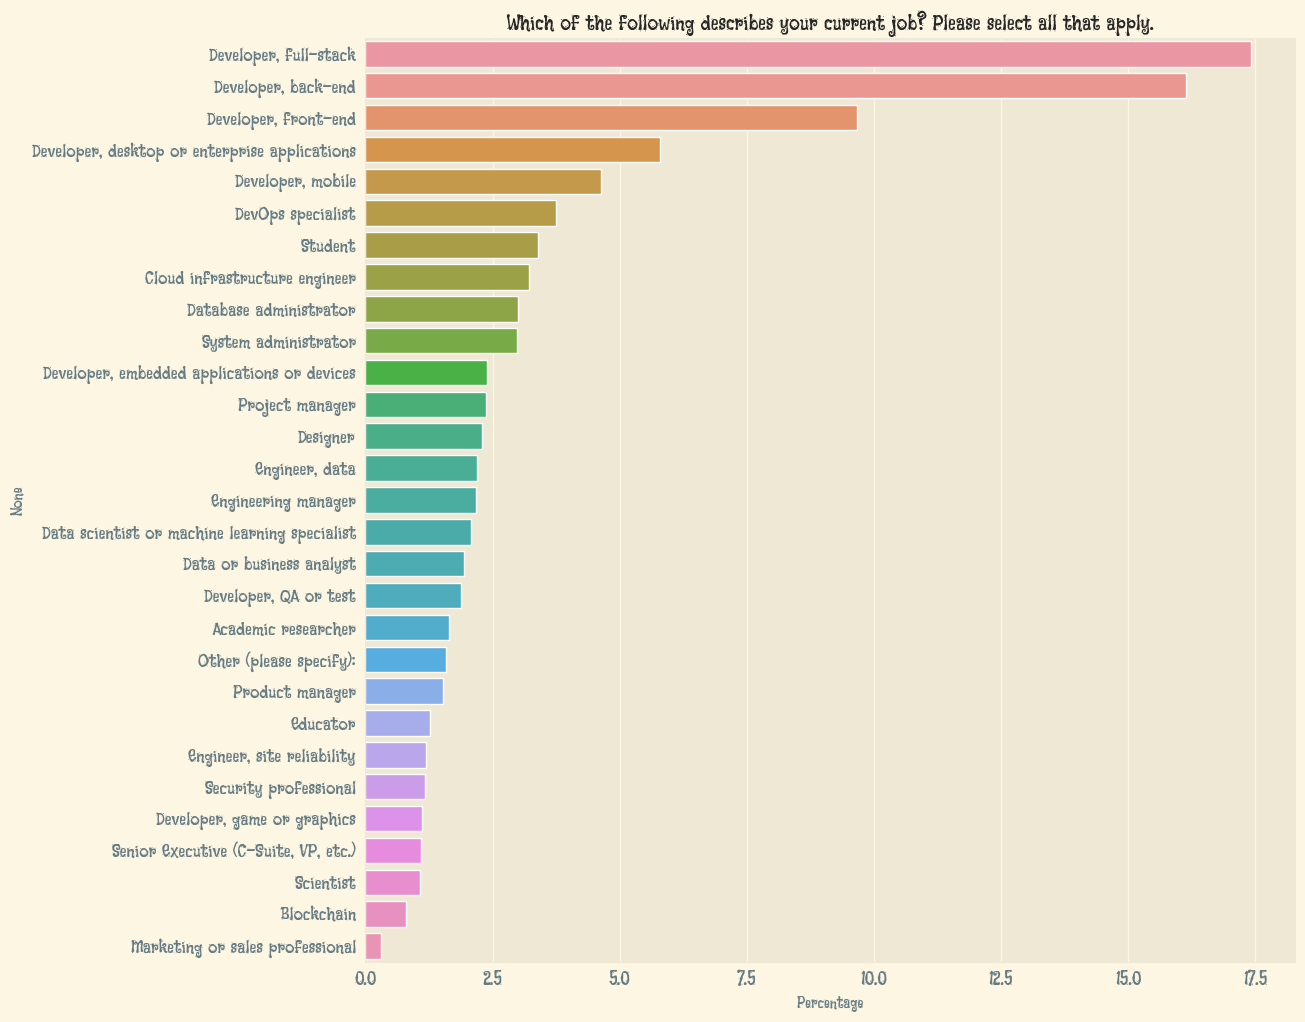

In [33]:
plt.figure(figsize=(12,12))
plt.title(survey_data_sche["DevType"])
sns.barplot(x=devtype_percentage,y=devtype_percentage.index)
plt.xlabel('Percentage')
plt.ylabel('None')
plt.show()

In [68]:
Language = survey_df.LanguageHaveWorkedWith.dropna().str.split(';')

ResponseId
2                                 [JavaScript, TypeScript]
3                  [C#, C++, HTML/CSS, JavaScript, Python]
4                        [C#, JavaScript, SQL, TypeScript]
5        [C#, HTML/CSS, JavaScript, SQL, Swift, TypeScr...
6                                               [C++, Lua]
                               ...                        
73264    [Bash/Shell, Dart, JavaScript, PHP, Python, SQ...
73265      [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
73266             [HTML/CSS, JavaScript, PHP, Python, SQL]
73267                                    [C#, Delphi, VBA]
73268    [C#, JavaScript, Lua, PowerShell, SQL, TypeScr...
Name: LanguageHaveWorkedWith, Length: 70975, dtype: object

In [72]:
L_list = []
for values in Language.values:
    for i in values:
        if i not in L_list:
            L_list.append(i)
print(L_list)

['JavaScript', 'TypeScript', 'C#', 'C++', 'HTML/CSS', 'Python', 'SQL', 'Swift', 'Lua', 'PHP', 'C', 'Java', 'Delphi', 'Bash/Shell', 'PowerShell', 'Rust', 'Elixir', 'Erlang', 'Ruby', 'R', 'Scala', 'VBA', 'Dart', 'Go', 'Kotlin', 'Groovy', 'MATLAB', 'Perl', 'Haskell', 'Julia', 'LISP', 'Assembly', 'F#', 'Clojure', 'APL', 'Crystal', 'Fortran', 'Objective-C', 'SAS', 'OCaml', 'Solidity', 'COBOL']


In [78]:
percentage = split_multicolumn(survey_df.LanguageHaveWorkedWith).sum()/sum(split_multicolumn(survey_df.LanguageHaveWorkedWith).sum())*100
percentage

JavaScript     12.626522
TypeScript      6.729360
C#              5.405618
C++             4.356467
HTML/CSS       10.641589
Python          9.285767
SQL             9.550026
Swift           0.948559
Lua             0.779455
PHP             4.031037
C               3.722463
Java            6.428127
Delphi          0.628295
Bash/Shell      5.615775
PowerShell      2.331297
Rust            1.801148
Elixir          0.415419
Erlang          0.174270
Ruby            1.168775
R               0.899350
Scala           0.499428
VBA             0.865910
Dart            1.263658
Go              2.153765
Kotlin          1.769067
Groovy          0.640801
MATLAB          0.791961
Perl            0.446957
Haskell         0.428741
Julia           0.294709
LISP            0.253384
Assembly        1.056764
F#              0.198466
Clojure         0.290902
APL             0.137023
Crystal         0.092436
Fortran         0.175629
Objective-C     0.461638
SAS             0.118264
OCaml           0.114730


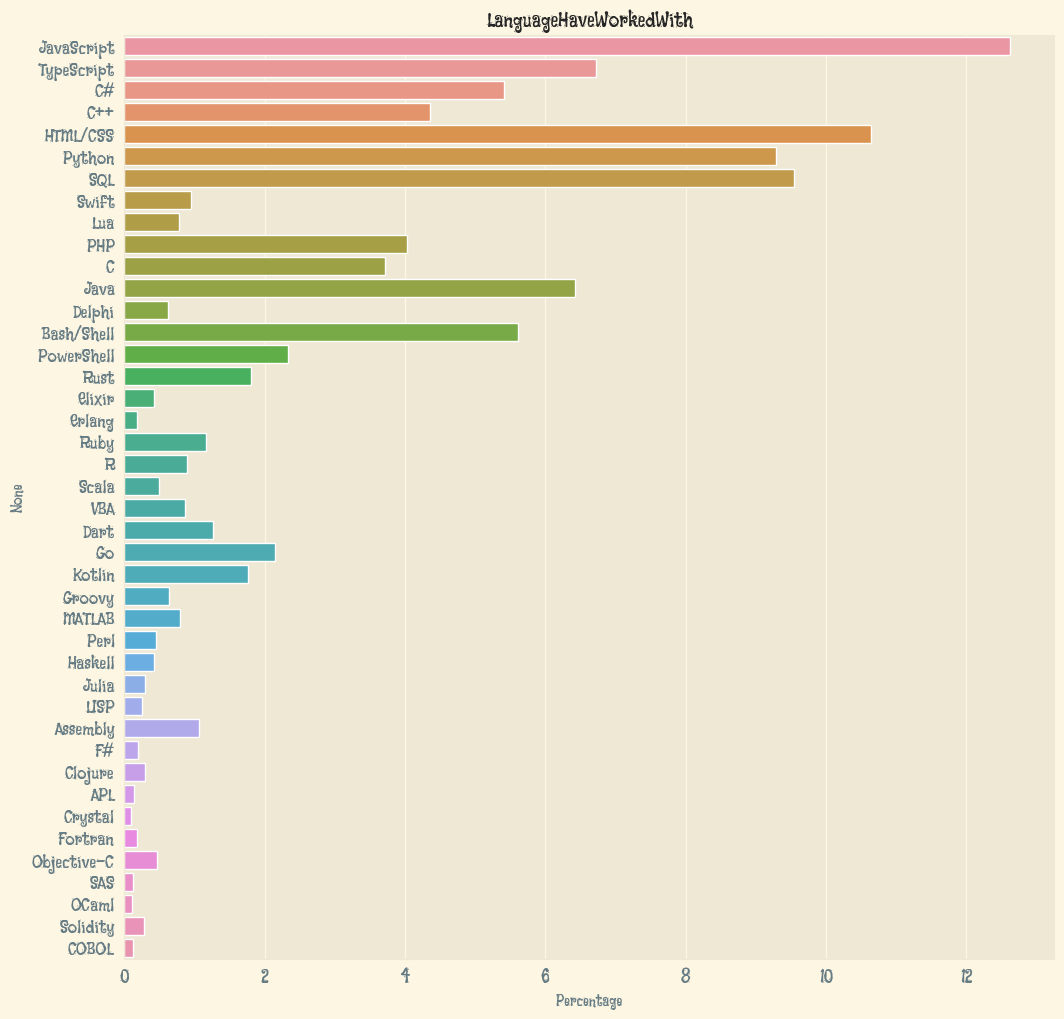

In [80]:
plt.figure(figsize=(12,12))
plt.title("LanguageHaveWorkedWith")
sns.barplot(x=percentage,y=percentage.index)
plt.xlabel('Percentage')
plt.ylabel('None')
plt.show()

In [127]:
home_country = survey_df[(survey_df.Country == 'South Korea' ) | (survey_df.Country == 'Republic of Korea')] # or로 하면 ==보다 우선순위에 있ㅇ
home_country.LanguageHaveWorkedWith

ResponseId
1289                                                  Rust
2933                                           Python;Rust
2991                        C++;HTML/CSS;JavaScript;Python
3024         Bash/Shell;Go;JavaScript;OCaml;SQL;TypeScript
3161                      C#;Go;JavaScript;Rust;TypeScript
                               ...                        
70985            C;C++;HTML/CSS;Java;JavaScript;Python;SQL
71427                                                  NaN
72114                                       Python;R;Swift
72244    Assembly;Bash/Shell;C;C#;C++;HTML/CSS;JavaScri...
73026                                   C;Java;Objective-C
Name: LanguageHaveWorkedWith, Length: 301, dtype: object

In [111]:
split_multicolumn(survey_df.DevType).sum()

Data scientist or machine learning specialist     3424
Developer, front-end                             15915
Engineer, data                                    3600
Engineer, site reliability                        1947
Developer, full-stack                            28701
Developer, back-end                              26595
Developer, desktop or enterprise applications     9546
Developer, QA or test                             3096
Student                                           5595
Developer, mobile                                 7634
Educator                                          2090
Engineering manager                               3574
Database administrator                            4934
Academic researcher                               2709
DevOps specialist                                 6170
Other (please specify):                           2618
Developer, embedded applications or devices       3923
Developer, game or graphics                       1837
Project ma

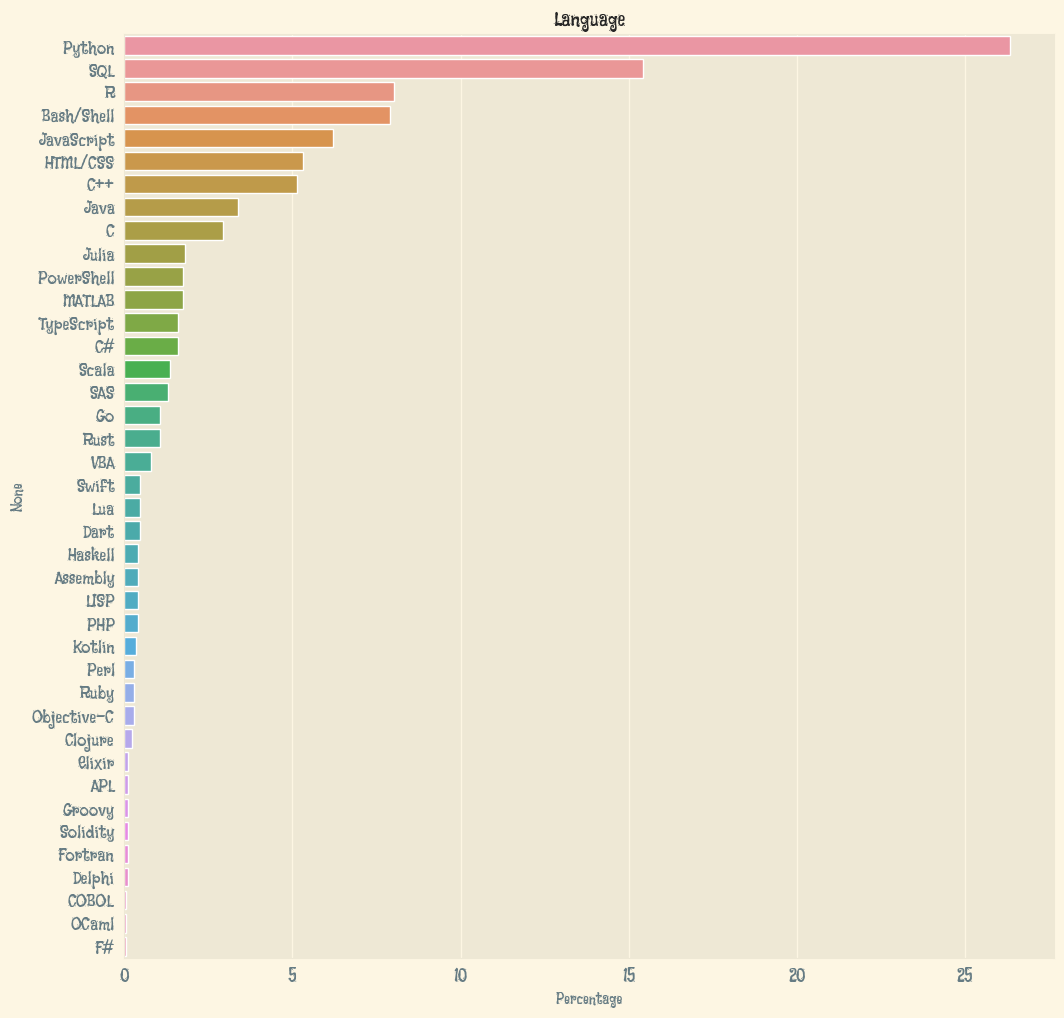

In [116]:
machin = survey_df[(survey_df.DevType == 'Data scientist or machine learning specialist')]
machin_sum = split_multicolumn(machin.LanguageHaveWorkedWith).sum()/sum(split_multicolumn(machin.LanguageHaveWorkedWith).sum())*100
machin_sum.sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.title("Language")
sns.barplot(x=machin_sum.sort_values(ascending=False),y=machin_sum.sort_values(ascending=False).index)
plt.xlabel('Percentage')
plt.ylabel('None')
plt.show()

In [134]:
a = survey_df.groupby('Country')
a.get_group('South Korea').LanguageHaveWorkedWith

ResponseId
1289                                                  Rust
2991                        C++;HTML/CSS;JavaScript;Python
3024         Bash/Shell;Go;JavaScript;OCaml;SQL;TypeScript
3161                      C#;Go;JavaScript;Rust;TypeScript
3351        HTML/CSS;Java;JavaScript;Kotlin;SQL;TypeScript
                               ...                        
70938    Bash/Shell;C++;Groovy;HTML/CSS;Java;JavaScript...
70985            C;C++;HTML/CSS;Java;JavaScript;Python;SQL
71427                                                  NaN
72244    Assembly;Bash/Shell;C;C#;C++;HTML/CSS;JavaScri...
73026                                   C;Java;Objective-C
Name: LanguageHaveWorkedWith, Length: 229, dtype: object

In [136]:
machin2 = survey_df[(survey_df.DevType.str.contains('Data scientist or machine learning specialist', na=False))] #포함하는 관계
machin2

Country  \
ResponseId                                                      
3           United Kingdom of Great Britain and Northern I...   
42                                                     Israel   
51                                             Czech Republic   
62                                                     Mexico   
86                                   United States of America   
...                                                       ...   
73197                                             Netherlands   
73230                                United States of America   
73235                                                Thailand   
73255                                United States of America   
73265                                United States of America   

                        Age Gender  \
ResponseId                           
3           25-34 years old    Man   
42          18-24 years old    Man   
51          25-34 years old    Man   
62          25-34 years old    Man   
86          25-34 years old    Man   
...                     ...    ...   
73197       25-34 years old    Man   
73230       45-54 years old    Man   
73235       25-34 years old    Man   
73255       35-44 years old    Man   
73265       25-34 years old    Man   

                                                      EdLevel  YearsCode  \
ResponseId                                                                 
3             Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       14.0   
42          Secondary school (e.g. American high school, G...        3.0   
51            Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       11.0   
62          Some college/university study without earning ...        2.0   
86               Bachelor’s degree (B.A., B.S., B.Eng., etc.)       10.0   
...                                                       ...        ...   
73197         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       10.0   
73230         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       18.0   
73235                                                     NaN        3.0   
73255         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        7.0   
73265         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        6.0   

            YearsCodePro                             LanguageHaveWorkedWith  \
ResponseId                                                                    
3                    5.0                  C#;C++;HTML/CSS;JavaScript;Python   
42                   3.0                     Bash/Shell;HTML/CSS;Python;SQL   
51                   NaN                            Bash/Shell;Julia;Python   
62                   NaN                         Bash/Shell;HTML/CSS;Python   
86                   7.0                         Bash/Shell;Java;Python;SQL   
...                  ...                                                ...   
73197                0.0                   Bash/Shell;PowerShell;Python;SQL   
73230               15.0               Bash/Shell;C++;PowerShell;Python;SQL   
73235                4.0  Assembly;Bash/Shell;JavaScript;PHP;Python;R;SA...   
73255                6.0                                                  R   
73265                5.0          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   

                                       LanguageWantToWorkWith  \
ResponseId                                                      
3                       C#;C++;HTML/CSS;JavaScript;TypeScript   
42                                      Bash/Shell;Python;SQL   
51                                                        NaN   
62                            Assembly;Dart;Rust;Solidity;SQL   
86          Clojure;Dart;Go;Java;JavaScript;Kotlin;Python;...   
...                                                       ...   
73197                              Bash/Shell;Python;Rust;SQL   
73230                                              C++;Python   
73235                                         

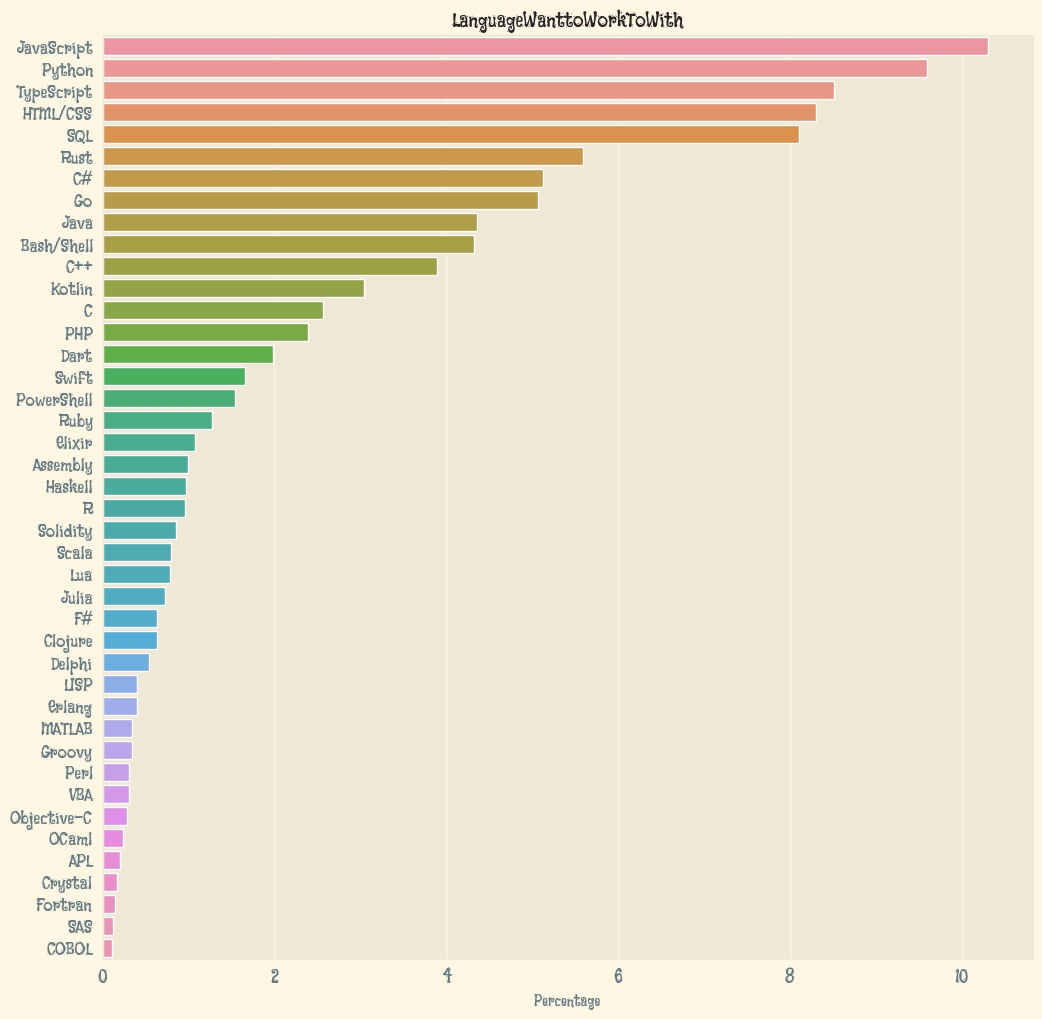

In [146]:
n_y = split_multicolumn(survey_df.LanguageWantToWorkWith).sum()/sum(split_multicolumn(survey_df.LanguageWantToWorkWith).sum())*100
n_y.sort_values(ascending=False)
plt.figure(figsize=(12,12))
sns.barplot(x=n_y.sort_values(ascending=False), y=n_y.sort_values(ascending=False).index)
plt.xlabel('Percentage')
plt.title('LanguageWanttoWorkToWith')
plt.show()

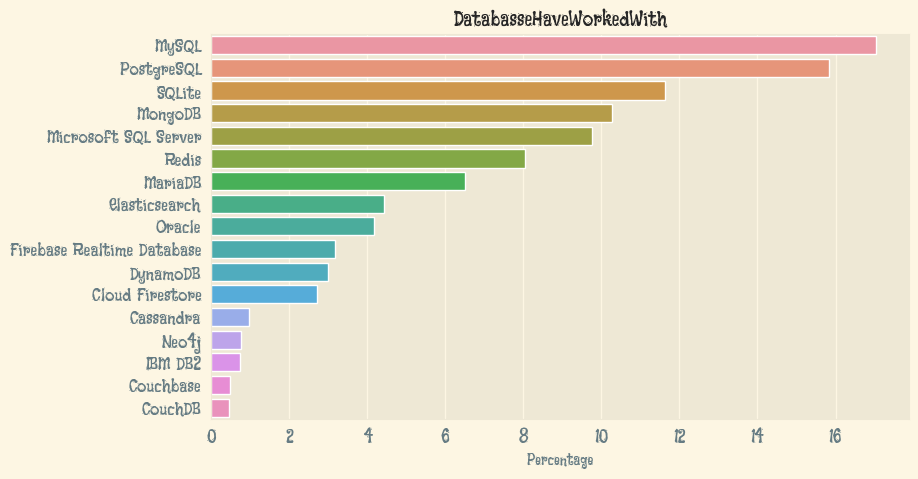

In [155]:
data = split_multicolumn(survey_data.DatabaseHaveWorkedWith).sum()
(data/sum(data)*100).sort_values(ascending=False)
plt.title('DatabasseHaveWorkedWith')
sns.barplot(x=(data/sum(data)*100).sort_values(ascending=False),y=(data/sum(data)*100).sort_values(ascending=False).index)
plt.xlabel('Percentage')
plt.show()

### *folium*: 지도 기반의 시각화- 파이썬 라이브러리로 지도 데이터를 시각화하는데 도움을 줍니다. leaflet.js를 기반으로 만들어졌습니다.

In [156]:
import folium

In [157]:
# 위치와 경도 추가하기
latitude,longitude = (37.468251, 126.886212)

In [159]:
m = folium.Map(location = [latitude, longitude], zoom_start=17, width=750, height= 500)
folium.Marker([latitude,longitude], popup='플레이데이터', tooltip='플레이데이터').add_to(m)
m

In [161]:
survey_raw_df = pd.read_csv('C:/python/data/survey_results_public.csv',index_col='ResponseId')
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [162]:
print(survey_raw_df)

                                                   MainBranch  \
ResponseId                                                      
1                                               None of these   
2                              I am a developer by profession   
3           I am not primarily a developer, but I write co...   
4                              I am a developer by profession   
5                              I am a developer by profession   
...                                                       ...   
73264                          I am a developer by profession   
73265                          I am a developer by profession   
73266       I am not primarily a developer, but I write co...   
73267                          I am a developer by profession   
73268       I used to be a developer by profession, but no...   

                                                   Employment  \
ResponseId                                                      
1                       

In [166]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country': country_counts.index,
                                 'Count':country_counts.values})
country_counts_df

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

In [167]:
country_counts_df.at[12, 'Country'] = 'Russia' #  제이슨 속성값과 데이터 값이 일치해야 해서 변경해줌

In [173]:
m=folium.Map(location=[30,0], zoom_start = 2)
folium.Choropleth(
    geo_data = countries_geojson,
    data = country_counts_df,
    columns = ['Country','Count'],
    key_on ="feature.properties.name",
    threshold_scale = [1,30,100,300,1_000,3_000,10_000,14_000],
    fill_color = 'YlGn', # color
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Respondents',
).add_to(m)

folium.LayerControl().add_to(m)
m

In [174]:
m.save('Country.html') # 노트북 경로 위치에 html파일이 저장이 됩니다.

In [175]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
s = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(s)
s

### 지도 JSON활용 사이트(참고):  https://python-visualization.github.io/folium/quickstart.html

In [177]:
from wordcloud import WordCloud

In [178]:
survey_raw_df

MainBranch  \
ResponseId                                                      
1                                               None of these   
2                              I am a developer by profession   
3           I am not primarily a developer, but I write co...   
4                              I am a developer by profession   
5                              I am a developer by profession   
...                                                       ...   
73264                          I am a developer by profession   
73265                          I am a developer by profession   
73266       I am not primarily a developer, but I write co...   
73267                          I am a developer by profession   
73268       I used to be a developer by profession, but no...   

                                                   Employment  \
ResponseId                                                      
1                                                         NaN   
2                                         Employed, full-time   
3                                         Employed, full-time   
4                                         Employed, full-time   
5                                         Employed, full-time   
...                                                       ...   
73264                                     Employed, full-time   
73265                                     Employed, full-time   
73266                                     Employed, full-time   
73267                                     Employed, full-time   
73268       Independent contractor, freelancer, or self-em...   

                                      RemoteWork  \
ResponseId                                         
1                                            NaN   
2                                   Fully remote   
3           Hybrid (some remote, some in-person)   
4                                   Fully remote   
5           Hybrid (some remote, some in-person)   
...                                          ...   
73264                               Fully remote   
73265                             Full in-person   
73266       Hybrid (some remote, some in-person)   
73267       Hybrid (some remote, some in-person)   
73268                               Fully remote   

                                             CodingActivities  \
ResponseId                                                      
1                                                         NaN   
2                    Hobby;Contribute to open-source projects   
3                                                       Hobby   
4                                I don’t code outside of work   
5                                                       Hobby   
...                                                       ...   
73264                                 Freelance/contract work   
73265                                                   Hobby   
73266                           Hobby;School or academic work   
73267                                                   Hobby   
73268       Hobby;Contribute to open-source projects;Boots...   

                                                    EdLevel  \
ResponseId                                                    
1                                                       NaN   
2                                                       NaN   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                     ...   
73264          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73265       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73266          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73267          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73268          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                

In [179]:
survey_raw_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [180]:
temp_words = survey_raw_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [181]:
temp_words = temp_words.str.replace(';',' ').str.replace(',',' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [182]:
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

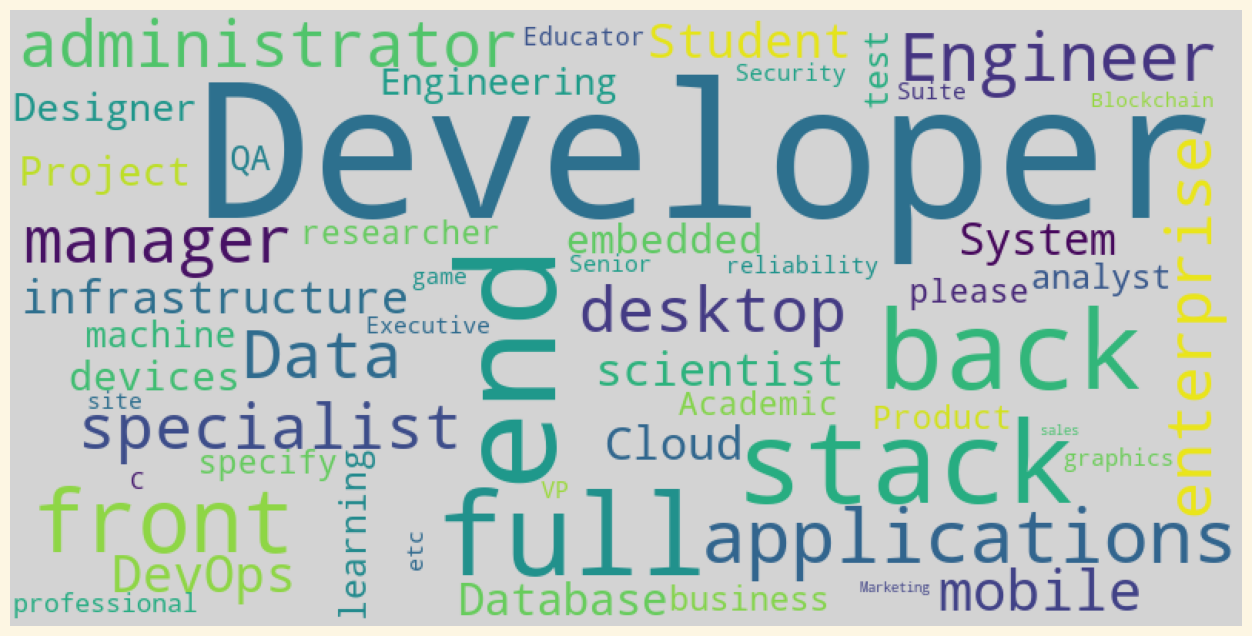

In [184]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path = ['폰트경로']
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height= 400,
               background_color = 'lightgray').generate(words) # 하나의 문자열을 공백으로 구분해서 던져주면 나옴!
plt.figure(figsize=(16,8))
# x,y축을 그리지 않습니다.
plt.axis('off')

#grid line을 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()